# MACHINE LEARNING : Cross Validation (KNN, DT & RF algorithm's )

## Dataset description

Breast cancer data includes 569 observations of cancer biopsies, each with 32 characteristics (variables).
One feature is an identification number (ID), another is a cancer diagnosis, and 30 are numerical
laboratory measurements. The diagnosis is coded as "M" to indicate malignant or "B" for indicate benign.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('dataset.csv')
display(df)
display(df.info())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

None

## Exploratory data analysis

First, we use sweetviz to generate a self-contained HTML report to know the fundermental infomation about the dataset.

In [2]:
import sweetviz as sv
import os.path
if not os.path.exists('SWEETVIZ_REPORT.html'):
    df_report = sv.analyze(df)
    df_report.show_html()

Map diagnosis to integer values for further analysis

In [3]:
df['diagnosis_map'] = df['diagnosis'].map({"B":1, "M":0})
df_all = df.copy()

Correlation analysis between diagnosis and measurement. Group mean, standard error, worst dataset into different group

round: 0


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


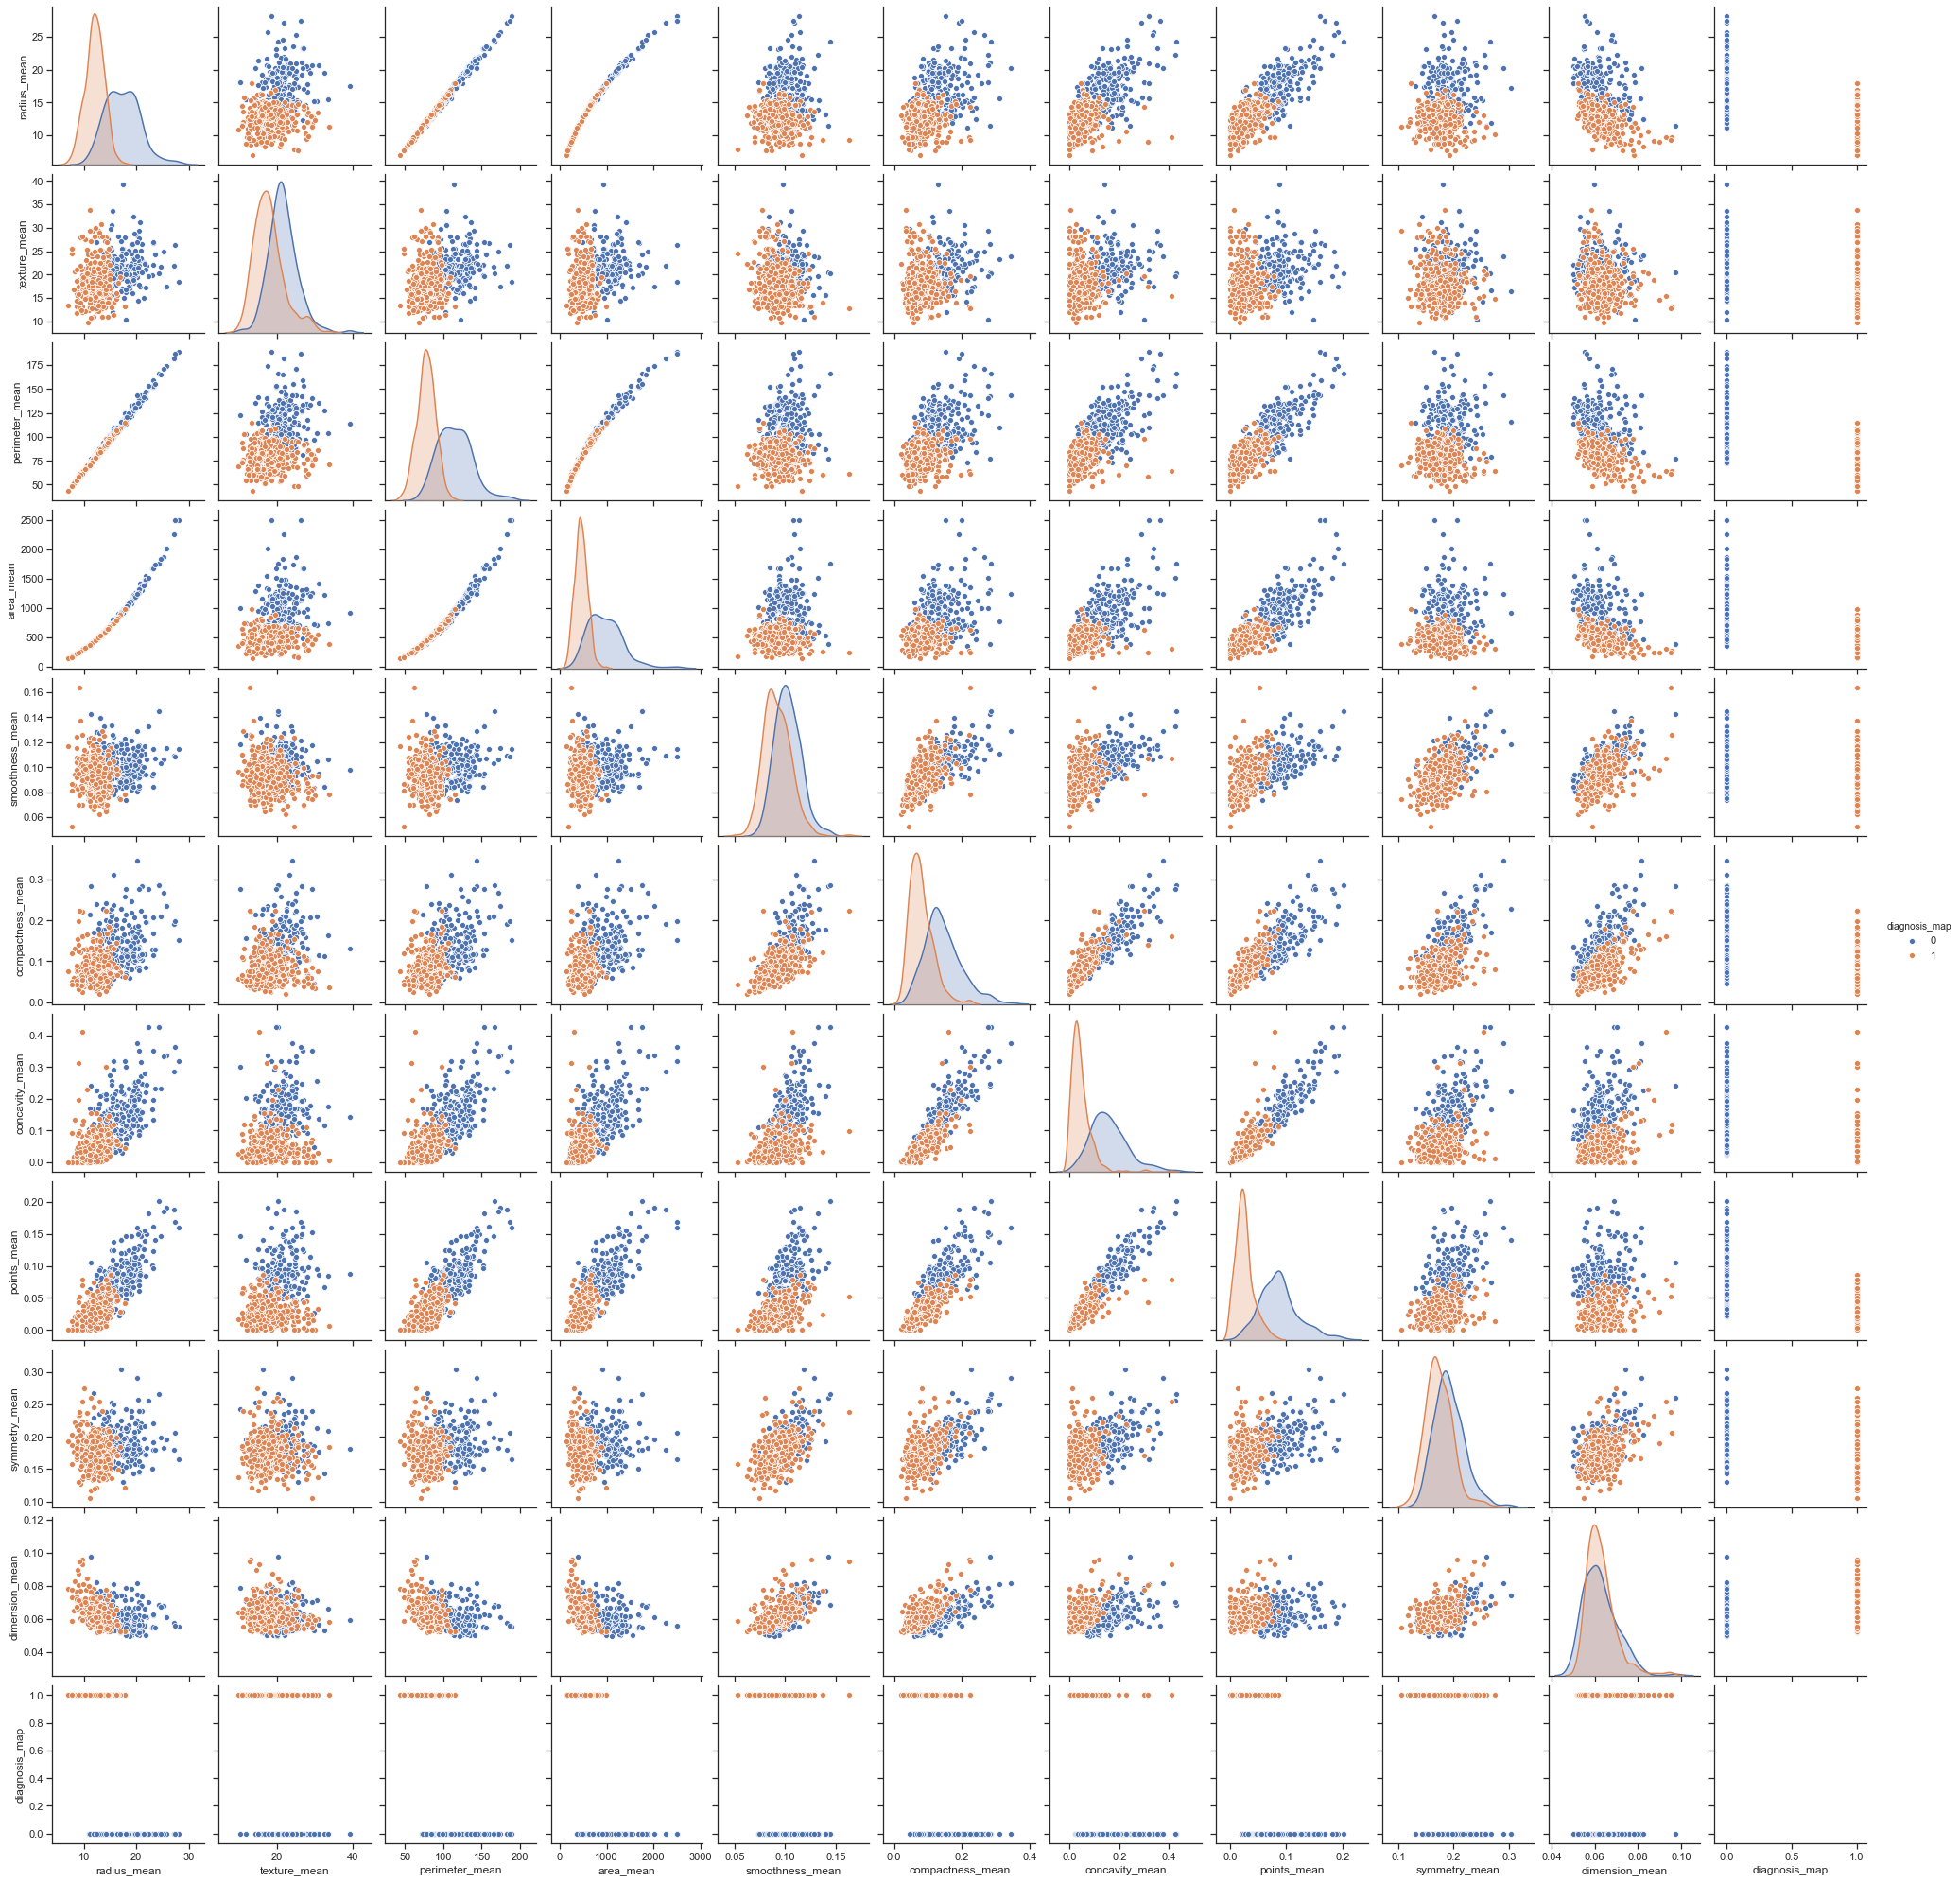

round: 1


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


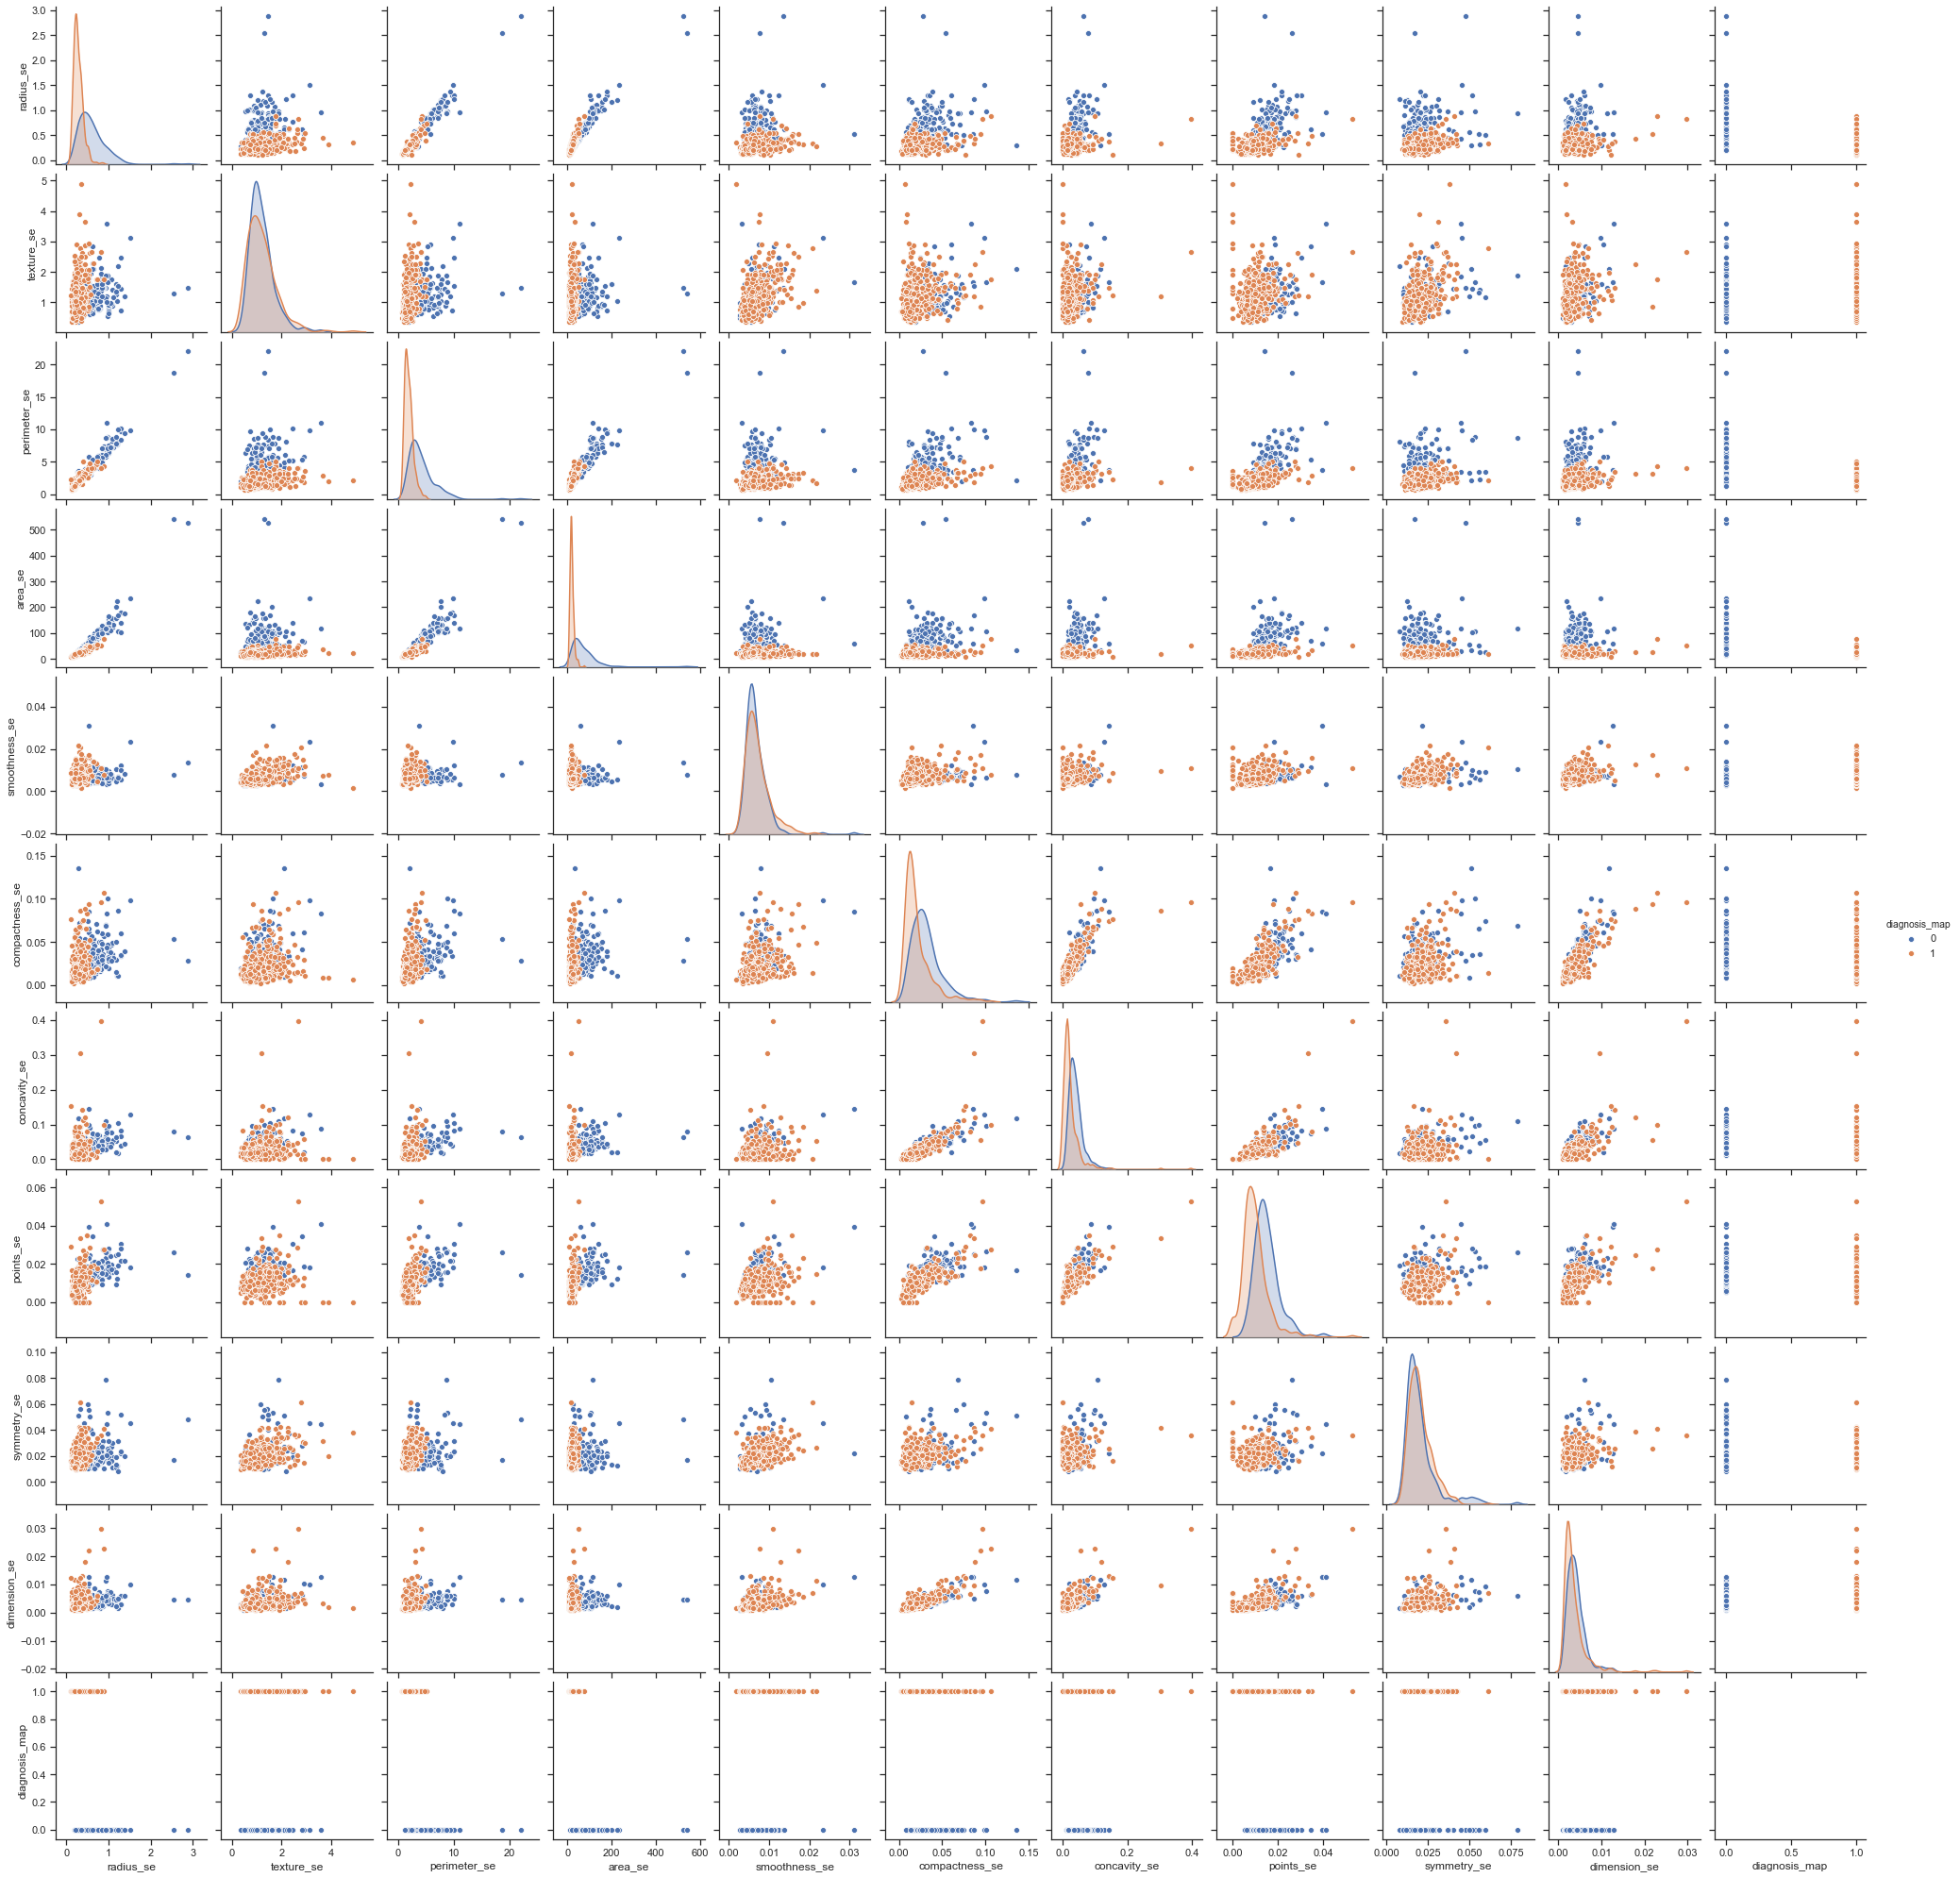

round: 2


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


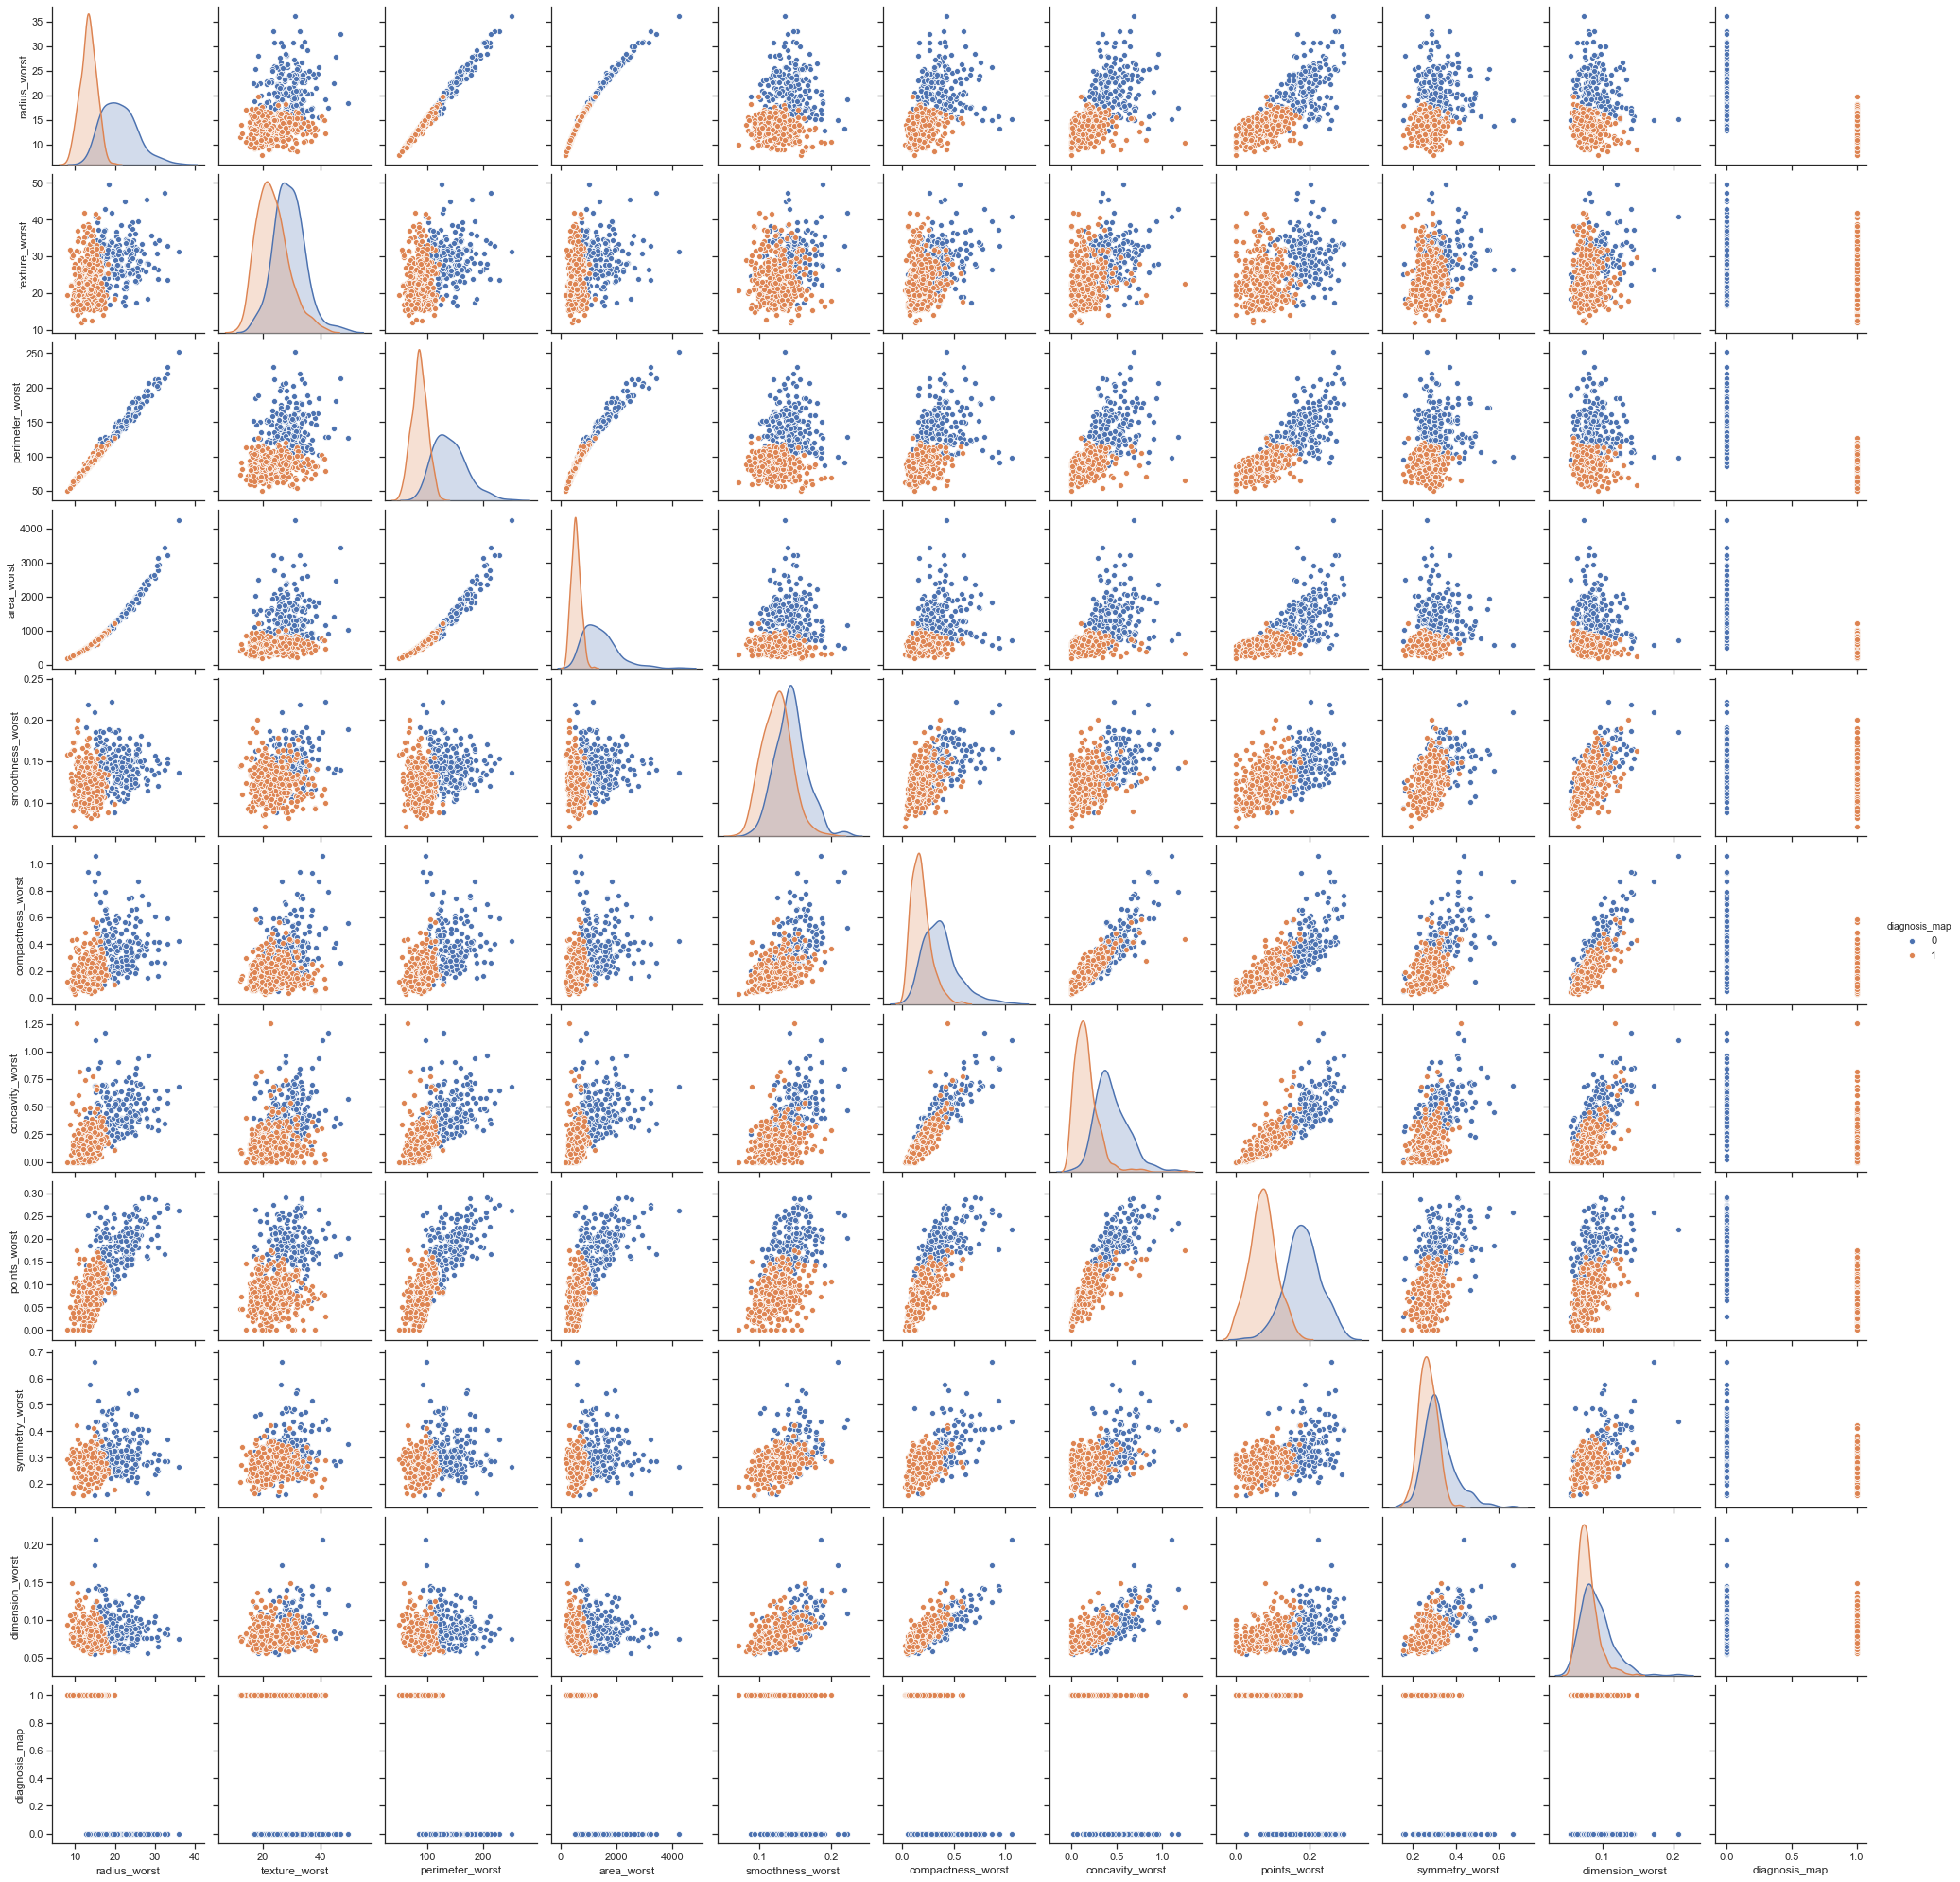

In [78]:
import numpy as np
import sys
import seaborn as sns

sys.setrecursionlimit(16385)
sns.set(style="ticks", color_codes=True)
#arr =  np.array(df.columns)
#arrs =  np.array_split(arr[(arr!='id') & (arr!='diagnosis')], 5)
arrs=[ [x for x in df.columns if '_mean' in x or '_map' in x],
      [x for x in df.columns if '_se' in x or '_map' in x],
      [x for x in df.columns if '_worst' in x or '_map' in x] ]
#print(arrs)
i = 0
for x in arrs:
    print('round:',i)
    i=i+1
    sns.pairplot(df,x_vars = x, y_vars=x,hue = 'diagnosis_map')
    plt.show()

From those pairplot charts, We can know diagnosis and measurement have obvious coorelation. Especially the features related to **points, concavity, compactness, perimeter, area**

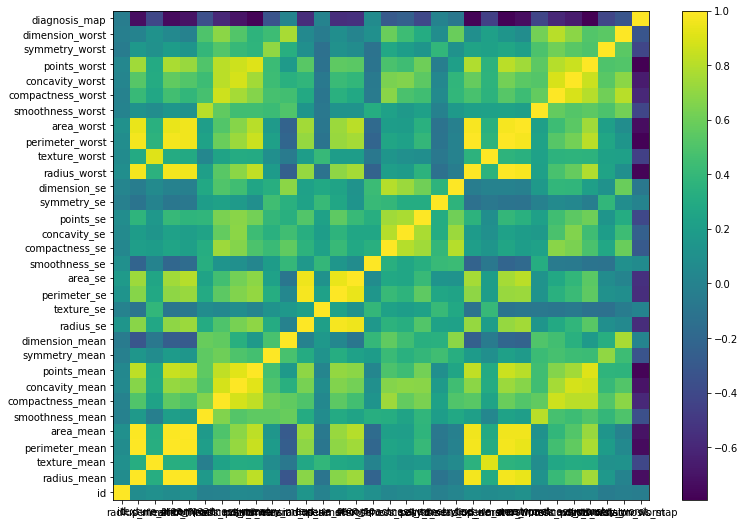

In [4]:
# Task 1.3 Plot correlation matrix for columns in flights_df
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 9))
corr = df.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

## Algorithms

List classification algorithms

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression  
from sklearn.linear_model import LinearRegression  
from sklearn.naive_bayes import GaussianNB  
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

def decisionTree():
    dt = DecisionTreeClassifier()
    return dt
def knn():
    knn = KNeighborsRegressor(n_neighbors=1)
    return knn

def extraTreesRegressor():
    clf = ExtraTreesRegressor(n_estimators=100,max_features='auto', verbose=0, n_jobs=1)
    return clf

def randomForestRegressor():
    clf = RandomForestRegressor(n_estimators=100,max_features='log2', verbose=0)
    return clf

def svm():
    clf = SVR(kernel='rbf', gamma='auto',max_iter=10000)
    return clf

def nn():
    clf = MLPRegressor(hidden_layer_sizes=(10,),  activation='relu', verbose=0,max_iter=10000)
    return clf

def LR():
    clf = LogisticRegression(solver='lbfgs', max_iter=10000)
    return clf

def NB():
    clf = GaussianNB()
    return clf

def allmodels():
    return {
    #    'NN':nn(),
    #    'SVM':svm(),
        'Logistic Regression': LR(),
        'Linear Regression': LinearRegression(),
        'Naive Bayes': GaussianNB(),
        'KNN':knn(),
        'Decision Tree': decisionTree(),
        'Random Forest': randomForestRegressor(),
        'Extra Tree': extraTreesRegressor(),
    }

Use IsolationForest algorithm for outlier data removal. Will remove 5% outlier data

In [78]:
from sklearn.ensemble import IsolationForest
def outlierRemove(X_df,Y_df):
    rs=np.random.RandomState(0)
    clf = IsolationForest(max_samples=len(X_df),random_state=rs, contamination=.05) 

    X_df['__YY'] = Y_df
    clf.fit(X_df)
    if_scores = clf.decision_function(X_df)
    if_anomalies=clf.predict(X_df)
    X_df['anom']=if_anomalies
    #display(X_df)
    X_df = X_df[X_df['anom']>0].drop(['anom'], axis = 1)
    return X_df.drop(['__YY'], axis = 1),X_df['__YY'] 

def norm(df):
    for col in df.columns:
        mean1 = np.mean(df[col])
        std1 = np.std(df[col])
        df[col] = (df[col].values - mean1)/std1
    return df


### K-Fold Cross Validation

In [79]:
def CrossValidation(df, models=allmodels(), doNorm = True, filterOutlier=True):
    Y_df = df['diagnosis_map']
    X_df = df.drop(['diagnosis_map'], axis = 1) 
    if doNorm==True:
        X_df = norm(X_df)
    kf = KFold(n_splits=5)
    model_result = pd.DataFrame(columns =  ['Algorithm','fold 1','fold 2','fold 3','fold 4','fold 5','fold mean'])
    for key,v in models.items():
        result = [key]
        estimator = v
        for train_index, test_index in kf.split(df):
            if filterOutlier==True:
                train_X_df, train_Y_df = outlierRemove(X_df.loc[train_index],Y_df.loc[train_index])
                estimator.fit(train_X_df,train_Y_df)
            else:
                estimator.fit(X_df.loc[train_index],Y_df.loc[train_index])
            score = estimator.score(X_df.loc[test_index], Y_df.loc[test_index])
            result.append(score)
        result.append(np.mean(result[1:6]))
        model_result.loc[len(model_result), :] = result
    model_result= model_result.sort_values('fold mean',ascending=False ).reset_index(drop=True)
    display( model_result)


- Apply cross-validation on all measurement features

In [81]:
df = df_all.copy().drop(['id', 'diagnosis'],axis=1)
CrossValidation(df, doNorm = False, filterOutlier=False)

,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,Logistic Regression,0.912281,0.938596,0.991228,0.95614,0.982301,0.956109
1,Naive Bayes,0.929825,0.938596,0.95614,0.912281,0.955752,0.938519
2,Decision Tree,0.921053,0.921053,0.912281,0.903509,0.929204,0.91742
3,Extra Tree,0.791426,0.847272,0.936189,0.881919,0.935527,0.878467
4,Random Forest,0.760129,0.831761,0.912159,0.870755,0.908897,0.85674
5,Linear Regression,0.69293,0.703014,0.741031,0.746137,0.734296,0.723481
6,KNN,0.472222,0.715,0.63285,0.719902,0.77668,0.663331


- Apply cross-validation on all measurement features with feature **normalization**

In [82]:
df = df_all.copy().drop(['id', 'diagnosis'],axis=1)
CrossValidation(df, doNorm = True, filterOutlier=False)

,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,Logistic Regression,0.938596,0.973684,0.982456,0.973684,1,0.973684
1,Naive Bayes,0.912281,0.938596,0.947368,0.894737,0.955752,0.929747
2,Decision Tree,0.903509,0.912281,0.894737,0.929825,0.929204,0.913911
3,Extra Tree,0.798462,0.839912,0.939358,0.884031,0.932159,0.878784
4,Random Forest,0.764416,0.834194,0.895014,0.866865,0.912771,0.854652
5,KNN,0.715812,0.8575,0.742995,0.759916,0.8139,0.778025
6,Linear Regression,0.69293,0.703014,0.741031,0.746137,0.734296,0.723481


- Apply cross-validation on all measurement features with **normalization** and **outlier's management**

In [83]:
df = df_all.copy().drop(['id', 'diagnosis'],axis=1)
CrossValidation(df, doNorm = True, filterOutlier=True)

,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,Logistic Regression,0.947368,0.973684,1,0.982456,1,0.980702
1,Naive Bayes,0.903509,0.929825,0.95614,0.929825,0.955752,0.93501
2,Decision Tree,0.912281,0.929825,0.868421,0.929825,0.938053,0.915681
3,Extra Tree,0.780721,0.84485,0.938135,0.882987,0.930291,0.875397
4,Random Forest,0.773843,0.837087,0.905764,0.875088,0.912741,0.860905
5,KNN,0.715812,0.8575,0.70628,0.759916,0.8139,0.770682
6,Linear Regression,0.668568,0.657439,0.704967,0.763845,0.662201,0.691404


We can see with normalization and outlier's management, the accuracy of prediction is increased. So below validation results are all do the normalization and outlier's management defaultly.

- Apply cross-validation on mean and se features

In [84]:
df = df_all.copy().drop(['id', 'diagnosis'],axis=1)
cols=[x for x in df.columns if '_mean' in x or '_map' in x or '_se' in x]
df = df[cols]
CrossValidation(df)

,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,Logistic Regression,0.894737,0.95614,0.964912,0.982456,0.973451,0.954339
1,Decision Tree,0.921053,0.885965,0.929825,0.947368,0.911504,0.919143
2,Naive Bayes,0.903509,0.912281,0.912281,0.929825,0.920354,0.91565
3,Extra Tree,0.69071,0.814835,0.884128,0.865677,0.849493,0.820969
4,Random Forest,0.6596,0.802527,0.859275,0.823646,0.83404,0.795818
5,KNN,0.553419,0.8575,0.63285,0.879958,0.8139,0.747525
6,Linear Regression,0.576943,0.672613,0.680063,0.749967,0.586635,0.653244


- Apply cross-validation on mean features

In [85]:
df = df_all.copy().drop(['id', 'diagnosis'],axis=1)
cols=[x for x in df.columns if '_mean' in x or '_map' in x]
df = df[cols]
CrossValidation(df)

,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,Logistic Regression,0.921053,0.938596,0.947368,0.964912,0.938053,0.941997
1,Decision Tree,0.921053,0.894737,0.921053,0.929825,0.929204,0.919174
2,Naive Bayes,0.885965,0.921053,0.921053,0.921053,0.938053,0.917435
3,Extra Tree,0.678754,0.773208,0.893284,0.798789,0.857045,0.800216
4,Random Forest,0.673959,0.787255,0.886084,0.788778,0.856256,0.798466
5,Linear Regression,0.538932,0.638287,0.645096,0.685816,0.567295,0.615085
6,KNN,0.472222,0.679375,0.70628,0.479817,0.70224,0.607987


- Apply cross-validation on features **points, concavity, compactness, perimeter, area** 

In [88]:
df = df_all.copy().drop(['id', 'diagnosis'],axis=1)
cols=[x for x in df.columns for c in ['points', 'concavity', 'compactness', 'perimeter', 'area'] if c in x]
cols.append('diagnosis_map')
#print(cols)
df = df[cols]
CrossValidation(df)

,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,Logistic Regression,0.921053,0.964912,0.973684,0.95614,0.964602,0.956078
1,Naive Bayes,0.912281,0.947368,0.947368,0.921053,0.938053,0.933225
2,Decision Tree,0.912281,0.929825,0.95614,0.938596,0.929204,0.933209
3,Random Forest,0.733687,0.827094,0.881708,0.79993,0.877006,0.823885
4,Extra Tree,0.731004,0.826528,0.899037,0.789506,0.872131,0.823641
5,KNN,0.634615,0.821875,0.85314,0.639874,0.73946,0.737793
6,Linear Regression,0.607099,0.663193,0.67381,0.672724,0.523685,0.628102


- Apply cross-validation on worst values of features **points, concavity, compactness, perimeter, area** 

In [89]:
df = df_all.copy().drop(['id', 'diagnosis'],axis=1)
cols=[x for x in df.columns for c in ['points_worst', 'concavity_worst', 'compactness_worst', 'perimeter_worst', 'area_worst'] if c in x]
cols.append('diagnosis_map')
#print(cols)
df = df[cols]
CrossValidation(df)

,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,Logistic Regression,0.929825,0.947368,0.938596,0.929825,0.973451,0.943813
1,Naive Bayes,0.929825,0.938596,0.938596,0.894737,0.973451,0.935041
2,Decision Tree,0.903509,0.921053,0.929825,0.877193,0.938053,0.913926
3,Extra Tree,0.789413,0.802962,0.872243,0.757151,0.896074,0.823568
4,Random Forest,0.76822,0.796421,0.838241,0.731302,0.909131,0.808663
5,KNN,0.75641,0.608125,0.669565,0.59986,0.92556,0.711904
6,Linear Regression,0.637559,0.640925,0.665122,0.670774,0.670145,0.656905


**Below is some observations base on the cross validation results**
1. With **normalization** and **outlier's management**, the accuracy of prediction is increased
2. Algorithm **Logistic Regression** have the best accuracy of the prediction.
3. The 5 features points, concavity, compactness, perimeter, area, especially the worst values of the 5 features are the key features to predict the diagnosis.
4. Algorithm **Naive Bayes** and **Decision Tree** are also have good results on diagnosis prediciton 

### Different hypermeters for best algorithm

**Logistic Regression with liblinear solver has the best result**, the accuracy could reach **98.2%** in the cross validation test.

In [91]:
m = {
    'LR with solver=lbfgs': LogisticRegression(solver='lbfgs', max_iter=10000),
    'LR with solver=liblinear': LogisticRegression(solver='liblinear', max_iter=10000, penalty='l2'),
    'LR with solver=liblinear and penalty=l1': LogisticRegression(solver='liblinear', max_iter=10000, penalty='l1'),
    'LR with solver=liblinear and λ=0.5': LogisticRegression(solver='liblinear', max_iter=10000, C=0.5),
    'LR with solver=liblinear and λ=7': LogisticRegression(solver='liblinear', max_iter=10000, C=7),
    'LR with solver=liblinear and λ=2': LogisticRegression(solver='liblinear', max_iter=10000, C=2),
    'LR with solver=liblinear and λ=10': LogisticRegression(solver='liblinear', max_iter=10000, C=10),
    'LR with solver=liblinear and λ=15': LogisticRegression(solver='liblinear', max_iter=10000, C=15),
    'LR with solver=newton-cg': LogisticRegression(solver='newton-cg', max_iter=10000),
    'LR with solver=sag': LogisticRegression(solver='sag', max_iter=10000),
    'LR with solver=saga': LogisticRegression(solver='saga', max_iter=10000),
    'LR with lbfgs and class=multinomial': LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=10000),
}
df = df_all.copy().drop(['id', 'diagnosis'],axis=1)
CrossValidation(df,models=m)

,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,LR with solver=liblinear,0.95614,0.973684,1,0.982456,1,0.982456
1,LR with solver=lbfgs,0.947368,0.973684,1,0.982456,1,0.980702
2,LR with solver=liblinear and λ=0.5,0.95614,0.973684,0.991228,0.982456,1,0.980702
3,LR with solver=newton-cg,0.947368,0.973684,1,0.982456,1,0.980702
4,LR with solver=sag,0.947368,0.973684,1,0.982456,1,0.980702
5,LR with solver=saga,0.947368,0.973684,1,0.982456,1,0.980702
6,LR with solver=liblinear and penalty=l1,0.938596,0.964912,0.991228,0.982456,0.99115,0.973669
7,LR with solver=liblinear and λ=2,0.929825,0.973684,0.982456,0.973684,1,0.97193
8,LR with lbfgs and class=multinomial,0.929825,0.973684,0.982456,0.973684,1,0.97193
9,LR with solver=liblinear and λ=7,0.921053,0.964912,0.973684,0.964912,1,0.964912
